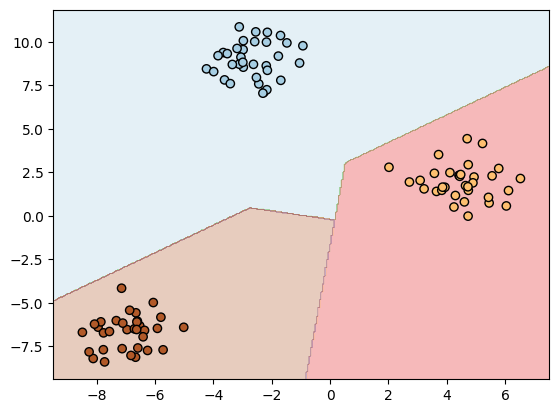

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

class PerceptronMulticlass:
    def __init__(self, learning_rate=0.01, n_iterations=1000, n_classes=3):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.n_classes = n_classes
        self.W = None
        self.b = None

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weight matrix W and bias vector b to zeros
        self.W = np.zeros((self.n_classes, n_features))
        self.b = np.zeros(self.n_classes)

        # Training process (One vs Rest approach)
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                true_class = y[idx]
                for j in range(self.n_classes):
                    z_j = np.dot(self.W[j], x_i) + self.b[j]
                    y_hat_j = self.step_function(z_j)
                    y_j = 1 if true_class == j else 0
                    if y_hat_j != y_j:
                        update = self.learning_rate * (y_j - y_hat_j)
                        self.W[j] += update * x_i
                        self.b[j] += update

    # Prediction function based on the linear output
    def predict(self, X):
        linear_output = np.dot(X, self.W.T) + self.b
        y_predicted = self.step_function(linear_output)
        return np.argmax(y_predicted, axis=1)

    # Function to visualize decision boundaries
    def plot_decision_boundary(self, X, y):
        # Visualización del límite de decisión
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                             np.arange(y_min, y_max, 0.05))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid)
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Paired, edgecolors='k', marker='o')
        plt.gcf()
        
# Example usage:
if __name__ == "__main__":
    X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

    # Initialize and train the multiclass perceptron
    perceptron = PerceptronMulticlass(learning_rate=0.01, n_iterations=1000, n_classes=3)
    perceptron.fit(X, y)

    # Visualize the decision boundaries
    perceptron.plot_decision_boundary(X, y)
